In [21]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

In [123]:
mit = pd.read_csv('data/mitbih_train.csv', header= None)

- The MIT-BIH dataset consists of ECG recordings from 47 different subjects recorded at the sampling rate of 360Hz. 
- The subjects were 25 men aged 32 to 89 years, and 22 women aged 23 to 89 years. (Records 201 and 202 came from the same male subject.)
- The database contains 23 records (numbered from 100 to 124 inclusive with some numbers missing) chosen at random from this set, and 25 records (numbered from 200 to 234 inclusive, again with some numbers missing) selected from the same set to include a variety of rare but clinically important phenomena that would not be well-represented by a small random sample of Holter recordings. Each of the 48 records is slightly over 30 minutes long.
- 

More info about the dataset here: https://physionet.org/content/mitdb/1.0.0/
and https://archive.physionet.org/physiobank/database/html/mitdbdir/intro.htm

Categories:

- 0 -
  Normal
  Left/Right bundle branch block
  Atrial escape
  Nodal escape
- 1 -
  Atrial premature
  Aberrant atrial premature
  Nodal premature
  Supra-ventricular premature
- 2 -
  Premature ventricular contraction
  Ventricular escape
- 3 -
  Fusion of ventricular and normal
- 4 -
  Paced
  Fusion of paced and normal
  Unclassifiable

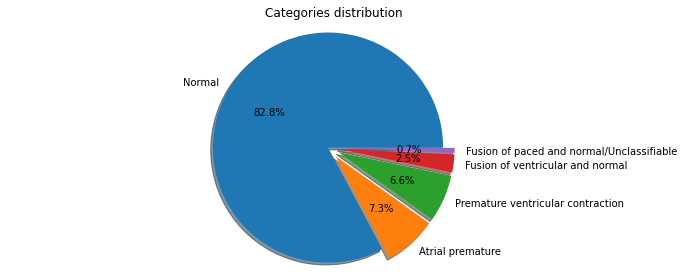

Normal:  72471
Atrial premature:  2223
Premature ventricular contraction:  5788
Fusion of ventricular and normal:  641
Fusion of paced and normal/Unclassifiable:  6431


In [169]:
classes = {0: 'Normal', 1: 'Atrial premature', 2: 'Premature ventricular contraction', 
           3: 'Fusion of ventricular and normal', 4: 'Fusion of paced and normal/Unclassifiable'}
col = ['blue', 'orange', 'green', 'red', 'purple']

mit[187]=mit[187].astype(int)
val = mit[187].value_counts().sort_index()
val.index = [classes[i] for i in range(5)]

labels =  classes.values
fig1, ax1 = plt.subplots(figsize = (10,4))
ax1.pie(mit[187].value_counts(), explode = (0, 0.1, 0.1, 0.1, 0.1) ,
        labels = [classes[i] for i in range(5)], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Categories distribution')
plt.tight_layout()
plt.show()

for i in range(5):
    print (classes[i]+': ', val[i])

Most of the samples have a normal ECG; on the other hand only 641 of them are classified as Fusion of paced and normal or Unclassifiable. We need to resample for balancing the dataset.

In [179]:
from sklearn.utils import resample

df = list()
for i in range(5):
    df.append(mit[mit[187] ==i])
    if i > 0:
        df[i] = df[i].sample(n=20000, replace = True)

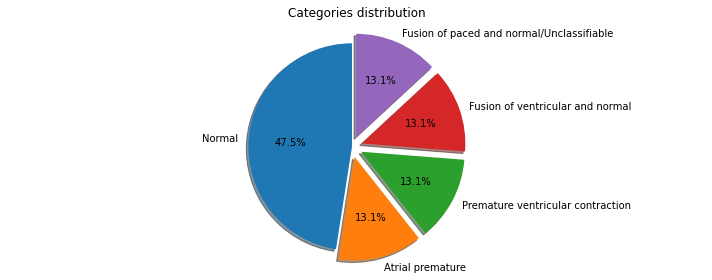

Normal:  72471
Atrial premature:  20000
Premature ventricular contraction:  20000
Fusion of ventricular and normal:  20000
Fusion of paced and normal/Unclassifiable:  20000


In [181]:
mit_s = pd.concat(df)

val_s = mit_s[187].value_counts().sort_index()
val_s.index = [classes[i] for i in range(5)]

labels =  classes.values
fig2, ax2 = plt.subplots(figsize = (10,4))
ax2.pie(mit_s[187].value_counts(), explode = (0, 0.1, 0.1, 0.1, 0.1) ,
        labels = [classes[i] for i in range(5)], autopct='%1.1f%%', startangle = 90,
        shadow=True)
ax2.axis('equal')
ax2.set_title('Categories distribution')
plt.tight_layout()
plt.show()

for i in range(5):
    print (classes[i]+': ', val_s[i])

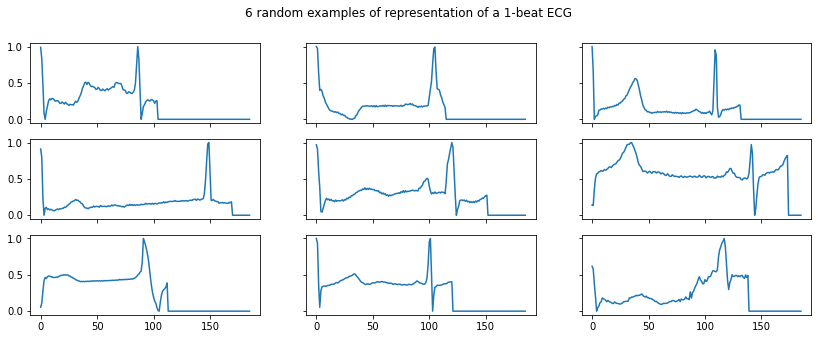

In [182]:
import random 

figure, ax = plt.subplots(3, 3, figsize=(14, 5))

figure.suptitle('6 random examples of representation of a 1-beat ECG')

for i in range(3):
    for j in range(3):
        r = random.randrange(len(mit))
        ax[i,j].plot(mit.iloc[r,:186])
        
for ax in figure.get_axes():
    ax.label_outer()
plt.show()

Let's see how the ECG differs per category.

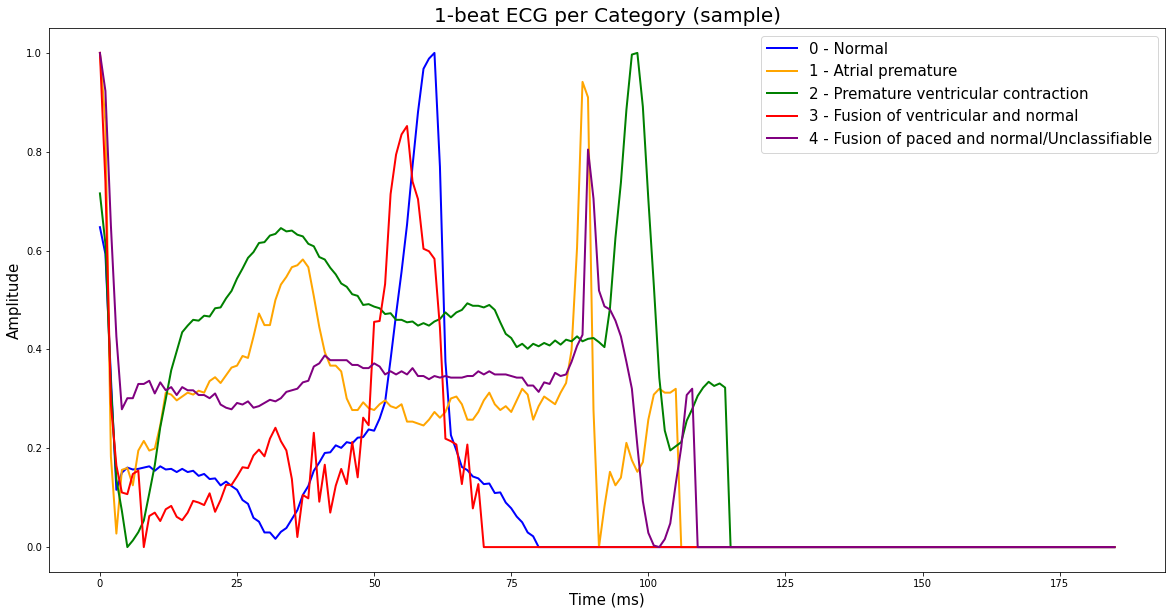

In [183]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,10))

for i in range(5):
    plt.plot(mit[mit[187]==i].sample(1).iloc[0,:186], label=str(i) + ' - ' + classes[i], 
             linewidth=2, color= col[i])

plt.legend(prop={'size': 15})
plt.title('1-beat ECG per Category (sample)', fontsize=20)
plt.ylabel('Amplitude', fontsize=15)
plt.xlabel('Time (ms)', fontsize=15)
plt.show()

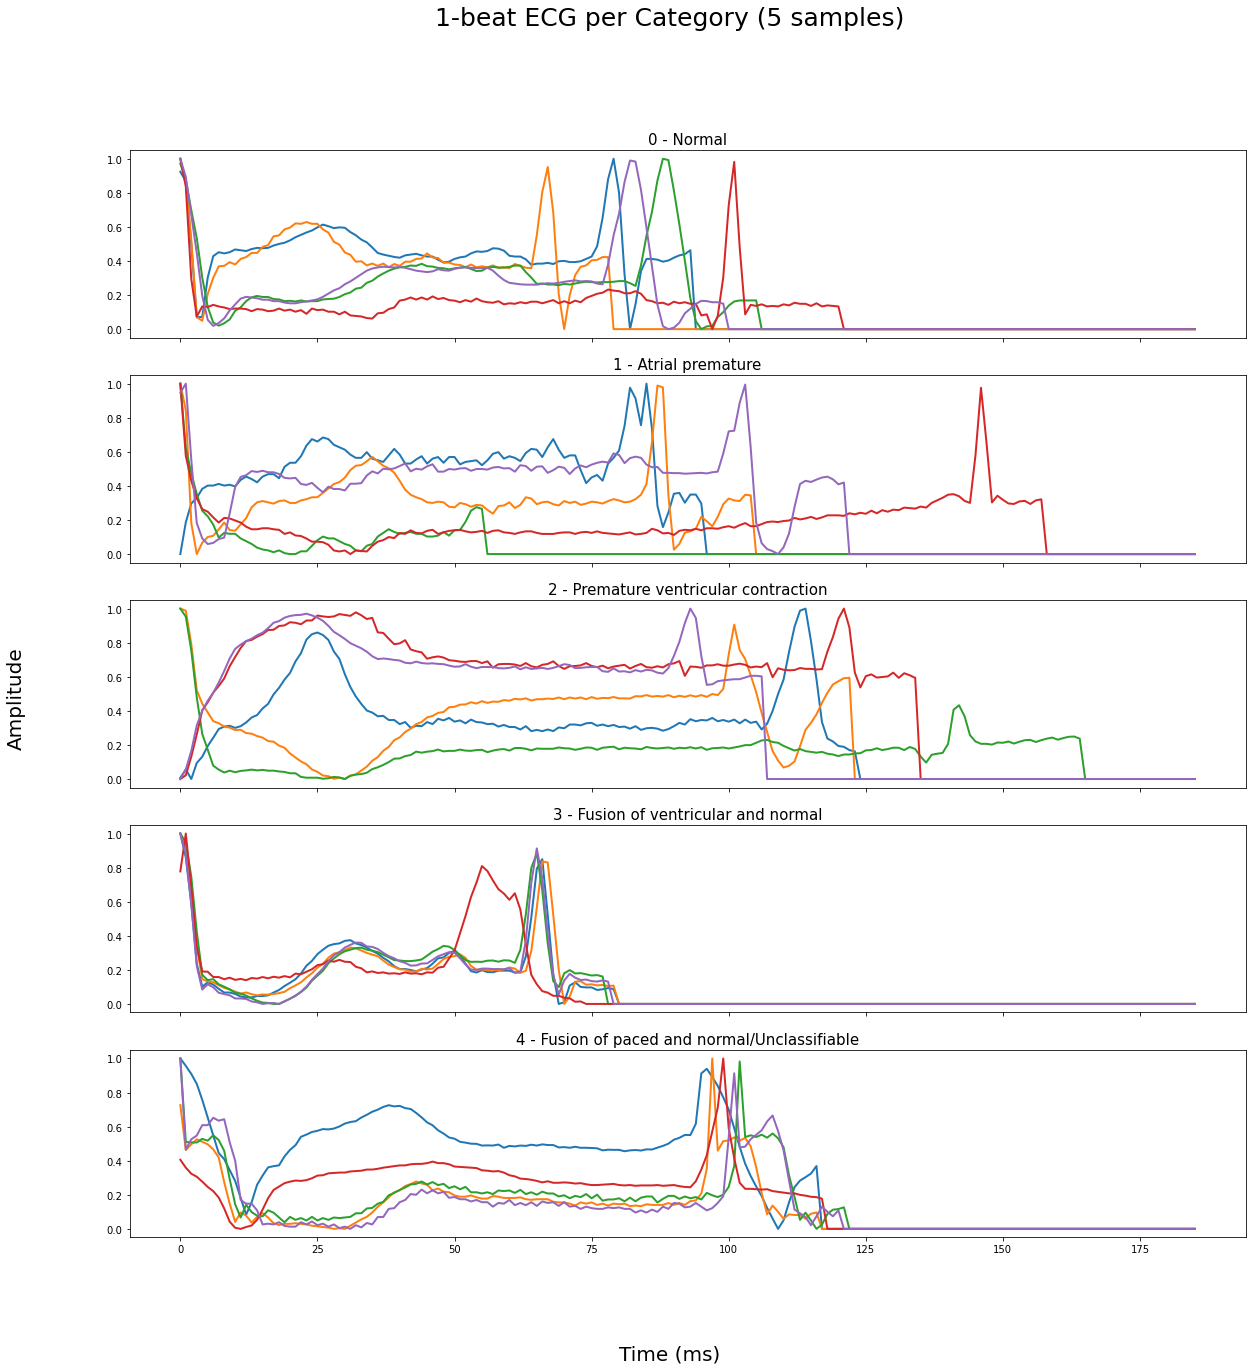

In [184]:
figure, ax = plt.subplots(5, figsize=(20, 20), sharex=True, sharey=True)

for i in range(5):
    for s in range(5):
        ax[i].plot(mit[mit[187]==i].sample(1).iloc[0,:186], 
               linewidth=2)
    ax[i].set_title(str(i) + ' - ' + classes[i], fontsize = 15)

figure.suptitle('1-beat ECG per Category (5 samples)', fontsize = 25)
figure.text(0.5, 0.04, 'Time (ms)', ha='center', fontsize=20)
figure.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=20)

plt.show()

In [185]:
mit.describe()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
